# Cleaning Dataset

## Import Libraries

Import the required libraries:
- `pandas` as `pd`: Utilized for data manipulation and analysis.
- `numpy` as `np`: Employed for numerical operations and array manipulation.
- `matplotlib.pyplot` as `plt`: Utilized for data visualization.
- `seaborn` as `sns`: Utilized for statistical data visualization.
- `os`: Used for operating system dependent functionality.
- `StandardScaler` and `MinMaxScaler` from `sklearn.preprocessing`: Utilized for feature scaling.
- `PCA` from `sklearn.decomposition`: Utilized for principal component analysis.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

## Utility Function

In this section, we will define some utility functions that we will use later in the code. These functions are designed to perform specific tasks efficiently and will help streamline our workflow as we proceed with the implementation.

### Histogram

In [2]:
# Create a histogram
def sea_histogram(dataframe_to_plot, column_of_interest, figsize=(8,10), title=None, xlabel=None, 
                  ylabel=None, hue=None, palette="deep", stat="count", binwidth=None,
                  multiple="layer", element="step", fill=True, shrink=1, kde=False, color="blue", 
                  log_scale=None, ylog=False, xlog=False, show_grid=False, vline=False,
                  n_vline=0, c_vline="red", discrete=False, kde_kws=None):
    """
    This function creates a histogram using seaborn library with customizable options.

    Parameters:
    - dataframe_to_plot (DataFrame): DataFrame containing the data to be plotted.
    - column_of_interest (list or str): Name of the column to be plotted on the x-axis.
    - figsize (tuple, optional): Size of the figure (width, height).
    - title (str, optional): Title of the plot.
    - xlabel (str, optional): Label for the x-axis.
    - ylabel (str, optional): Label for the y-axis.
    - hue (str, optional): Variable used for grouping the data.
    - palette (str, list or dict, optional): Color palette for the plot.
    - stat (str, , optional): Statistic to compute within each bin (count, density, probability).
    - binwidth (number, optional): Width of each bin.
    - multiple (str, optional): Method for plotting multiple histograms (layer, dodge, stack).
    - element (str, optional): Element to draw (step, poly).
    - fill (bool, optional): Whether to fill the histogram bars.
    - shrink (number, optional): Scaling factor for the width of the step/poly elements.
    - kde (bool, optional): Whether to plot a kernel density estimate.
    - color (str, optional): Color of the histogram bars (if hue is not specified).
    - log_scale (str, optional): Scaling of the x or y-axis (linear, log, symlog, logit).
    - ylog (bool, optional): Whether to use a logarithmic scale for the y-axis.
    - xlog (bool, optional): Whether to use a logarithmic scale for the x-axis.
    - show_grid (bool, optional): Whether to show grid lines on the plot.
    - vline (bool, optional): Add a vertical red line.
    - n_vline (number, optional): Position in x-axis of the vline.
    - c_vline (str, optional): Color of the vline.
    - discrete (bool, optional): If True, default to binwidth=1.
    - kde_kws (dict, optional): Parameters that control the KDE computation.


    Returns:
    - None: The function displays the plot.
    """

    plt.figure(figsize=figsize)
    
    if hue:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, hue=hue, stat=stat, 
                     binwidth=binwidth, multiple=multiple, element=element, fill=fill, 
                     shrink=shrink, kde=kde, palette=palette, log_scale=log_scale, discrete=discrete,
                     kde_kws=kde_kws)
    else:
        sns.histplot(data=dataframe_to_plot, x=column_of_interest, stat=stat, 
                     binwidth=binwidth, element=element, fill=fill,
                     shrink=shrink, kde=kde, color=color, log_scale=log_scale, discrete=discrete,
                     kde_kws=kde_kws)
        
    if ylog:
        plt.yscale("log")

    if xlog:
        plt.xscale("log")
    
    if vline:
        # Add a vertical red
        plt.axvline(x=n_vline, color=c_vline, linestyle='--')  

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if show_grid:
        plt.grid(True)

    plt.show()

### Box Plot

In [3]:
def boxplot_func(columns_of_interest, data_frame, whis=1.5, yscale=None, title=None, figsize=(8,8)):
    """
    Generates a boxplot for specified columns in a DataFrame.

    Parameters:
    - columns_of_interest (list or str): List of column names or single column name to be plotted.
    - data_frame (DataFrame): The DataFrame containing the data to be plotted.
    - whis (float, optional): The proportion of the IQR past the low and high quartiles to extend the plot whiskers. 
                               Defaults to 1.5.
    - yscale (str, optional): The scale of the y-axis. Supported values are 'linear', 'log', 'symlog', 'logit'.
                               Defaults to None.
    - title (str, optional): The title of the plot. Defaults to None.
    - figsize (tuple, optional): Figure size (width, height) in inches. Defaults to (8, 8).

    Returns:
    - None: The function displays the plot.
    """

    data_frame.boxplot(column=columns_of_interest, whis=whis, figsize=figsize)
    
    # Set y-axis scale if specified
    if yscale is not None:
        plt.yscale(yscale)

    plt.title(title) 
    plt.show()


### Pie Plot

In [4]:
def pieplot_func(value_counts_to_plot, labels, figsize=(8, 8), title=None, autopct_value='%1.1f%%', labeldistance=1.1):
    """
    Create a pie chart to visualize the distribution of values.

    Args:
    - value_counts_to_plot (array-like): The values to plot.
    - labels (array-like): Corresponding labels for the values.
    - figsize (tuple, optional): Figure size (width, height) in inches. Defaults to (8, 8).
    - title (str, optional): Title of the pie chart. Defaults to None.
    - autopct_value (str, optional): Format string for autopct parameter in percentage display. 
                                     Defaults to '%1.1f%%'.
    - labeldistance (float, optional): The radial distance at which the labels are drawn. Defaults to 1.1.

    Returns:
    - None: Displays the pie chart.
    """
    plt.figure(figsize=figsize)
    
    # Plot pie chart with autopct if provided
    if autopct_value is not None:
        plt.pie(value_counts_to_plot, labels=labels, autopct=autopct_value, startangle=90, labeldistance=labeldistance)
    else:
        plt.pie(value_counts_to_plot, labels=labels, startangle=90, labeldistance=labeldistance)
    
    plt.title(title)
    plt.show()


### Sorting Columns

In [5]:
def reorder_columns(dataframe, columns):
    """
    Reorders the columns of the DataFrame based on the number of unique values in each column.
    Columns with only two unique values are placed first, followed by other columns.

    Parameters:
    - dataframe (DataFrame): The pandas DataFrame.
    - columns (list): A list containing the names of the columns to be reordered.

    Returns:
    - list: A list containing the reordered column names.
    """

    reordered_columns = []  # List to store column names with only two unique values
    non_bin_columns = []     # List to store column names with more than two unique values

    # Iterate through the specified columns
    for col in columns:
        # Check if the number of unique values in the column is equal to 2
        if dataframe[col].nunique() == 2:
            # If yes, append the column name to reordered_columns
            reordered_columns.append(col)
        else:
            # If no, append the column name to non_bin_columns
            non_bin_columns.append(col)

    # Combine the two lists to get the final reordered column order
    reordered_columns = reordered_columns + non_bin_columns
    
    return reordered_columns


### Remove Outliers

In [6]:
def remove_outliers(dataframe, column_name, threshold, minor=False):
    """
    Remove outliers from a specific column in the dataframe based on a threshold.

    Args:
    - dataframe (DataFrame): The pandas DataFrame.
    - column_name (str): The name of the column containing the values to be checked for outliers.
    - threshold (float): The threshold value above which outliers will be removed.
    - minor (bool, optional): If True, remove values below the threshold. If False (default), remove values above the threshold.

    Returns:
    - DataFrame: The modified DataFrame with outliers removed.
    """
    if not minor:
        dataframe.loc[dataframe[column_name] > threshold, column_name] = np.nan
    else:
        dataframe.loc[dataframe[column_name] < threshold, column_name] = np.nan

    return dataframe[column_name]

## Loading Datasets

We start by reading data from three Excel files and store them in pandas DataFrames:

- `chl_dataset`: Data from the "OrmoniTiroidei3Aprile2024.xlsx" file. Our main dataset.
- `date_dataset`: Data from the "DataPrelievo.xlsx" file.
- `creatinina_dataset`: Data from the "Creatinina_AltriEsamiCorretti.xlsx" file.


In [7]:
chl_dataset=pd.read_excel("Datasets/OrmoniTiroidei3Aprile2024.xlsx")
date_dataset=pd.read_excel("Datasets/DataPrelievo.xlsx")
creatinina_dataset=pd.read_excel("Datasets/Creatinina_AltriEsamiCorretti.xlsx")

In [8]:
#To display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

We now print the first few rows of DataFrames, using the `.head()`command and allowing for quick inspection of the data.

In [9]:
chl_dataset.head()

,Number,Gender (Male = 1),Age,Total cholesterol,HDL,LDL,Triglycerides,Glycemia,TSH,fT3,fT4,Euthyroid,Subclinical primary hypothyroidism (SCH),Subclinical primary hyperthyroidism\n(SCT),Low T3,Ipotiroidismo,Ipertiroidismo,Angina,Previous CABG,Previous PCI,Previous Myocardial Infarction,Acute Myocardial Infarction,Angiography,Vessels,CAD,Documented resting \nor exertional ischemia,Post-ischemic Dilated\nCardiomyopathy,Primary Dilated\nCardiomyopathy,Normal,SindromeX,AMI,PMI,Aritmie,MIN,MIO,Miocardite,Pericardite,Endocardite,Valvulopatie,MalattiaVasoAorta,Ipertensione,CardiopatiaCongenita,EmboliaPolmonare,EPA,HR,Weight,Height,BMI,Diastolic blood pressure,Systolic blood pressure,Smoke\nHistory of smoke,Diabetes\nHistory of diabetes,Hypertension\nHistory of hypertension,Dyslipidemia\nHystory of dyslipidemia,Atrial Fibrillation,WmsiBas,DimSettoIV,DimPP,fe,vsx,B-Blockers,Amiodarone,Calcium channel blockers,Diuretics,Antiplatelet,Nitrates,ACE-inhibitors,Ipolipemizzanti,Antidiabetici,Follow Up Data,Data of death,Cause of death,Collected by,Total mortality,CVD Death,Fatal MI or Sudden death,UnKnown,Accident,Suicide,CABG,Non Fatal AMI (Follow-Up),Ictus,PCI
0,1.0,1.0,56.033708,196.0,52.0,118.0,130.0,104.0,1.26,2.72,12.3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,72.0,165.0,26.446281,65.0,100.0,0.0,0.0,0.0,1.0,0.0,2.44,10.0,9.0,35.0,56.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2013-09-20,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2004-12-01,NaT,NaT,NaT
1,2.0,1.0,62.898876,123.0,43.0,71.0,45.0,220.0,0.73,2.78,12.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,80.0,170.0,27.681661,70.0,140.0,1.0,1.0,0.0,1.0,0.0,1.18,11.0,9.0,53.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2013-01-08,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT
2,3.0,1.0,60.876404,248.0,37.0,180.0,157.0,87.0,1.65,1.74,8.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,73.0,170.0,25.259516,80.0,140.0,0.0,0.0,0.0,1.0,0.0,1.29,10.0,10.0,48.0,54.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2013-05-14,NaT,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2004-02-19,NaT,NaT,NaT
3,4.0,1.0,75.396067,NaN,NaN,NaN,NaN,NaN,0.40,7.20,17.2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,75.0,172.0,25.351541,60.0,120.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,39.0,67.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1994-06-29,1994-06-29,Other cardiac causes,Necropsy certificate,1.0,1.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT
4,5.0,1.0,80.803371,139.0,33.0,81.0,126.0,103.0,7.32,2.22,11.9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,70.0,69.0,168.0,24.447279,70.0,110.0,0.0,1.0,1.0,1.0,1.0,2.00,NaN,NaN,40.0,72.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2007-06-10,2007-06-10,Sudden death,Relatives (Telephone interview),1.0,1.0,1.0,0.0,0.0,0.0,NaT,NaT,NaT,NaT


In [10]:
date_dataset.head()

,Number,Data prelievo
0,1,2003-08-25
1,2,2010-10-19
2,3,2004-01-09
3,4,1994-01-24
4,5,2003-10-28


In [11]:
creatinina_dataset.head()

,Number,Total cholesterol,HDL,LDL,Triglycerides,Creatinina
0,1,196.0,52.0,118.0,130.0,0.83
1,2,123.0,43.0,71.0,45.0,0.80
2,3,248.0,37.0,180.0,157.0,1.01
3,4,NaN,NaN,NaN,NaN,NaN
4,5,139.0,33.0,81.0,126.0,1.59


Now, let's provide some information about the datasets using the `.info()` method.

In [12]:
chl_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 83 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Number                                      8065 non-null   float64       
 1   Gender (Male = 1)                           8065 non-null   float64       
 2   Age                                         8065 non-null   float64       
 3   Total cholesterol                           7705 non-null   float64       
 4   HDL                                         7455 non-null   float64       
 5   LDL                                         6905 non-null   float64       
 6   Triglycerides                               7627 non-null   float64       
 7   Glycemia                                    7651 non-null   float64       
 8   TSH                                         8065 non-null   float64       
 9   fT3     

In [13]:
creatinina_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8065 entries, 0 to 8064
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             8065 non-null   int64  
 1   Total cholesterol  7705 non-null   float64
 2   HDL                7455 non-null   float64
 3   LDL                7433 non-null   float64
 4   Triglycerides      7627 non-null   float64
 5   Creatinina         7469 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 378.2 KB


## Cleaning Datasets

In this section, we focus on cleaning our datasets to ensure they are primed for analysis and modeling.

First of all, we remove four columns from the main dataset `chl_dataset`, as these columns will be re-added in their updated version present in the `creatinina_dataset` dataset.

In [14]:
chl_dataset=chl_dataset.drop(columns=["HDL", "LDL", "Triglycerides", "Total cholesterol"])

Therefore, we use the `.merge()` method to merge the columns from the `creatinina_dataset` to our main dataset. In addition to the four columns removed earlier, a new column regarding creatinine, which was not present before, will be added. To perform this operation, we use the "Number" column as the merging key, which contains the number associated with each patient.

Furthermore, we create a new dataframe called `merge_dataframe` by merging the column from the `date_dataset` to the `chl_dataset`, once again utilizing the "Number" column as the merging key. We will use the `merge_dataset` with its new columns to extract the "Target" column, which will be employed in our machine learning algorithm.

In [15]:
chl_dataset=pd.merge(chl_dataset, creatinina_dataset, on="Number")
merge_dataset=pd.merge(chl_dataset, date_dataset, on=["Number"])

We remove rows from the datasets where the value in the "Number" column is missing (NaN). To do this we use the `.dropna()` method.

In [16]:
chl_dataset=chl_dataset.dropna(subset=["Number"])
merge_dataset=merge_dataset.dropna(subset=["Number"])

We delete from the `chl_dataset` dataset the columns we are not interested in, as they are not medical test results but information on whether each patient died.

In [17]:
chl_dataset=chl_dataset.drop(columns=["PCI", "Ictus", "Non Fatal AMI (Follow-Up)", "CABG ", 
                            "Suicide","Accident", "UnKnown", "Fatal MI or Sudden death",
                            "CVD Death", "Total mortality", "Collected by", "Cause of death",
                            "Follow Up Data", "Data of death"])

We reorder the columns of `chl_dataset` so that binary columns come first, followed by continuous columns. To achieve this, we use the `reorder_columns` utility function defined in the previous section.

In [18]:
data_columns=chl_dataset.columns
data_columns

reordered_columns=reorder_columns(chl_dataset, data_columns)

In [19]:
chl_dataset = chl_dataset.reindex(columns=reordered_columns)

We check to see if there are any columns with less than two different values, thus with only one occurrence as a value, and find "CardiopathyCongenitis" as the result. Having only 0 as a possible value, we decide to delete it.

In [20]:
for col in chl_dataset.columns:
    if chl_dataset[col].nunique() < 2:
        print(col)

CardiopatiaCongenita


In [21]:
chl_dataset.CardiopatiaCongenita.value_counts()
chl_dataset=chl_dataset.drop(columns=["CardiopatiaCongenita"])

### Detecting Outliers with Angle Based Method

In [23]:
chl_dataset2=chl_dataset.copy()

In [46]:
chl_dataset2=chl_dataset2.dropna()
chl_dataset3=chl_dataset2.dropna()

In [42]:
from sklearn.neighbors import LocalOutlierFactor

# Creare un modello LOF
lof_model = LocalOutlierFactor()

# Addestrare il modello sul dataset
lof_model.fit(chl_dataset2)

# Calcolare lo score di anomalia per ciascuna osservazione nel dataset
anomaly_scores = lof_model.negative_outlier_factor_

# Identificare gli outliers (osservazioni con score di anomalia negativo)
outliers_indices = anomaly_scores.argsort()[:100]  # Esempio: identificare i primi 10 outliers

# Stampare gli indici degli outliers
print("Indici degli outliers:", outliers_indices)


Indici degli outliers: [5268 2080 5539 4954 4590 4611 1736  352 4463 4049 2787  606 1941 4491
 3407  702 5559 2212  929 2124 5426 5624 3635 4674 2981 3707 2863 3988
 2247 4181 5571 3923 5035 1416 5275  401 4833 3978 3021 1927 4242 4956
 4906  724 1473 3422 6251 5830  452 1163   96  511 3185   55 3174 1589
 3252 2666 1978 2635 1358 5755 2960 1925 3278 4168 5495 1857 2925 5072
 1760  334  557 2932 2244 1390 1342 4583 4175 2572 2218 4989   89 5650
 4922 2287  346 5629 5821 2038 3455 5616 2008 4429  947 3372 2476  747
  581 6262]


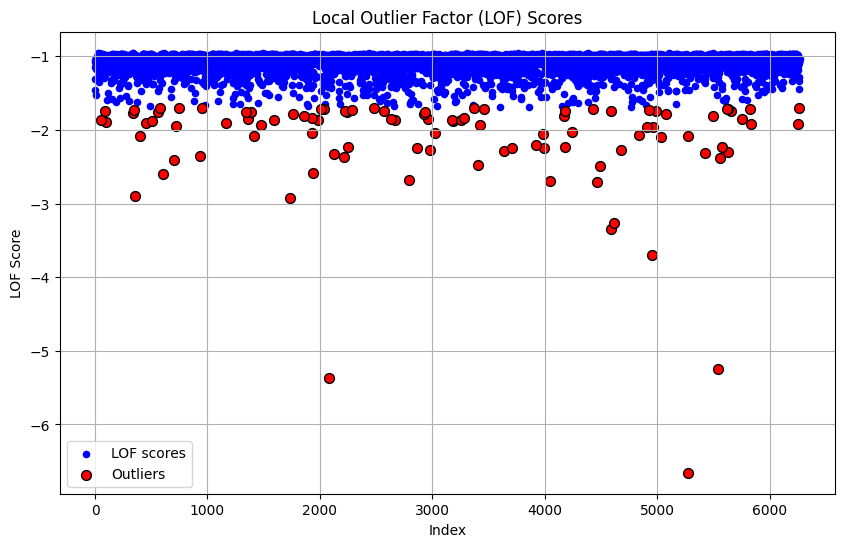

In [43]:
import matplotlib.pyplot as plt

# Plot dei valori LOF
plt.figure(figsize=(10, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c='blue', s=20, label='LOF scores')

# Indica gli outliers con un colore diverso
plt.scatter(outliers_indices, anomaly_scores[outliers_indices], c='red', s=50, edgecolors='k', label='Outliers')

plt.title('Local Outlier Factor (LOF) Scores')
plt.xlabel('Index')
plt.ylabel('LOF Score')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
random_state = np.random.RandomState(42)

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=random_state)

model.fit(chl_dataset3)

print(model.get_params())

{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x320B77B40, 'verbose': 0, 'warm_start': False}


In [48]:
chl_dataset3['scores'] = model.decision_function(chl_dataset3)

chl_dataset3['anomaly_score'] = model.predict(chl_dataset3)

chl_dataset3[chl_dataset3['anomaly_score']==-1].head()

,Gender (Male = 1),Euthyroid,Subclinical primary hypothyroidism (SCH),Subclinical primary hyperthyroidism\n(SCT),Low T3,Ipotiroidismo,Ipertiroidismo,Angina,Previous CABG,Previous PCI,Previous Myocardial Infarction,Acute Myocardial Infarction,Angiography,CAD,Documented resting \nor exertional ischemia,Post-ischemic Dilated\nCardiomyopathy,Primary Dilated\nCardiomyopathy,Normal,SindromeX,AMI,PMI,Aritmie,MIN,MIO,Miocardite,Pericardite,Endocardite,Valvulopatie,MalattiaVasoAorta,Ipertensione,EmboliaPolmonare,EPA,Smoke\nHistory of smoke,Diabetes\nHistory of diabetes,Hypertension\nHistory of hypertension,Dyslipidemia\nHystory of dyslipidemia,Atrial Fibrillation,B-Blockers,Amiodarone,Calcium channel blockers,Diuretics,Antiplatelet,Nitrates,ACE-inhibitors,Ipolipemizzanti,Antidiabetici,Number,Age,Glycemia,TSH,fT3,fT4,Vessels,HR,Weight,Height,BMI,Diastolic blood pressure,Systolic blood pressure,WmsiBas,DimSettoIV,DimPP,fe,vsx,Total cholesterol,HDL,LDL,Triglycerides,Creatinina,scores,anomaly_score
10,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,11.0,75.876404,119.0,0.01,2.19,20.0,4.0,48.0,74.0,174.0,24.441802,90.0,170.0,1.88,11.0,11.0,35.0,61.0,236.0,53.0,168.0,76.0,1.08,-0.021210,-1
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,12.0,87.089888,85.0,4.71,2.81,10.7,3.0,60.0,73.0,168.0,25.864512,65.0,135.0,2.34,16.0,8.0,28.0,70.0,218.0,49.0,130.0,196.0,1.33,-0.036388,-1
14,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,15.0,82.196629,86.0,3.27,2.27,15.6,0.0,60.0,75.0,170.0,25.951557,60.0,135.0,1.88,13.0,11.0,35.0,57.0,80.0,28.0,42.0,52.0,1.74,-0.001371,-1
17,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,18.0,77.733146,101.0,1.10,2.58,12.5,0.0,70.0,70.0,173.0,23.388687,80.0,130.0,2.58,9.0,9.0,25.0,60.0,133.0,46.0,71.0,81.0,1.09,-0.011433,-1
20,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,21.0,54.162921,113.0,0.16,2.89,14.0,2.0,46.0,69.0,166.0,25.039919,80.0,137.0,1.89,10.0,10.0,35.0,56.0,279.0,38.0,216.0,124.0,0.94,-0.001386,-1


In [50]:
anomalies = chl_dataset3[chl_dataset3['anomaly_score'] == -1]

# Calcola il numero totale di anomalie
anomaly_count = len(anomalies)

accuracy = 100 * anomaly_count / len(chl_dataset3)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 10.185185185185185


### Detecting Outliers in Continue Columns

In this section, we display various plots for the continuous columns to examine their distribution and remove values that we consider outliers.

#### Glycemia 

In [ ]:
chl_dataset.Glycemia.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Glycemia", 
             data_frame=chl_dataset, 
             yscale='log', 
             whis=4,
             title="Box Plot for Glycemia in log scale",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Glycemia",
              xlabel="Glycemia",
              ylabel="Count",
              title="Distribution of Glycemia in log scale",
              vline=True,
              n_vline=350,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `Glycemia` values that are above 350 and see how the distribution improves.

In [ ]:
chl_dataset["Glycemia"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="Glycemia",
                                        threshold=350)

In [ ]:
chl_dataset.Glycemia.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Glycemia",
              xlabel="Glycemia",
              ylabel="Count",
              title="Distribution of Glycemia",
              show_grid=True,
              element="bars",
              figsize=(7,6),
              kde=True,
              color="coral",
              binwidth=5
              )

#### TSH

In [ ]:
chl_dataset.TSH.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="TSH", 
             data_frame=chl_dataset, 
             whis=12,
             title="Box Plot for TSH",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="TSH",
              xlabel="TSH",
              ylabel="Count",
              title="Distribution of TSH in log scale",
              vline=True,
              n_vline=21,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `TSH` values that are above 21 and see how the distribution improves.

In [ ]:
chl_dataset["TSH"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="TSH",
                                        threshold=21)

In [ ]:
chl_dataset.TSH.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="TSH",
              xlabel="TSH",
              ylabel="Count",
              title="Distribution of TSH",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              binwidth=1,
              kde_kws= { "bw_method": 0.5}
              )

#### fT3  

In [ ]:
chl_dataset.fT3.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="fT3", 
             data_frame=chl_dataset,  
             whis=10,
             title="Box Plot for fT3",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="fT3",
              xlabel="fT3",
              ylabel="Count",
              title="Distribution of fT3 in log scale",
              vline=True,
              n_vline=13,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `fT3` values that are above 13 and see how the distribution improves.

In [ ]:
chl_dataset["fT3"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="fT3",
                                        threshold=13)

In [ ]:
chl_dataset.fT3.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="fT3",
              xlabel="fT3",
              ylabel="Count",
              title="Distribution of fT3",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              binwidth=0.15
              )

#### fT4  

In [ ]:
chl_dataset.fT4.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="fT4", 
             data_frame=chl_dataset, 
             whis=8,
             title="Box Plot for fT4",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="fT4",
              xlabel="fT4",
              ylabel="Count",
              title="Distribution of fT4 in log scale",
              vline=True,
              n_vline=40,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `fT4` values that are above 40 and see how the distribution improves.

In [ ]:
chl_dataset["fT4"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="fT4",
                                        threshold=40)

In [ ]:
chl_dataset.fT4.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="fT4",
              xlabel="fT4",
              ylabel="Count",
              title="Distribution of fT4",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral"
              )

#### Vessels 

In [ ]:
chl_dataset.Vessels.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Vessels", 
             data_frame=chl_dataset,  
             whis=3,
             title="Box Plot for Vessels",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Vessels",
              xlabel="Vessels",
              ylabel="Count",
              title="Distribution of Vessels",
              show_grid=True,
              element="bars",
              figsize=(7,6)
              )

We do not eliminate any values for the `Vessels` column since we find no outliers.

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Vessels",
              xlabel="fT4",
              ylabel="Count",
              title="Distribution of Vessels",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              discrete=True,
              kde_kws= { "bw_method": 1}
              )

#### HR

In [ ]:
chl_dataset.HR.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="HR", 
             data_frame=chl_dataset, 
             #yscale='log', 
             whis=6,
             title="Box Plot for HR",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="HR",
              xlabel="HR",
              ylabel="Count",
              title="Distribution of HR in log scale",
              vline=True,
              n_vline=190,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `HR` values that are above 190 and see how the distribution improves.

In [ ]:
chl_dataset["HR"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="HR",
                                        threshold=190)

In [ ]:
chl_dataset.HR.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="HR",
              xlabel="HR",
              ylabel="Count",
              title="Distribution of HR",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              kde_kws={"bw_method": 0.4}
              )

#### Weight 

In [ ]:
chl_dataset.Weight.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Weight", 
             data_frame=chl_dataset, 
             whis=4,
             title="Box Plot for Weight",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Weight",
              xlabel="Weight",
              ylabel="Count",
              title="Distribution of Weight in log scale",
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We do not eliminate any values for the `Weight` column since we find no outliers.

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Weight",
              xlabel="Weight",
              ylabel="Count",
              title="Distribution of Weight",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral"
              )

#### Height

In [ ]:
chl_dataset.Height.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Height", 
             data_frame=chl_dataset,  
             whis=4,
             title="Box Plot for Height",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Height",
              xlabel="Height",
              ylabel="Count",
              title="Distribution of Height in log scale",
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We do not eliminate any values for the `Height` column since we find no outliers.

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Height",
              xlabel="Height",
              ylabel="Count",
              title="Distribution of Height",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              binwidth=2,
              kde_kws= { "bw_method": 0.4}
              )

#### BMI

In [ ]:
chl_dataset.BMI.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="BMI", 
             data_frame=chl_dataset, 
             whis=5,
             title="Box Plot for BMI",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="BMI",
              xlabel="BMI",
              ylabel="Count",
              title="Distribution of BMI in log scale",
              vline=True,
              n_vline=55,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `BMI` values that are above 55 and see how the distribution improves.

In [ ]:
chl_dataset["BMI"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="BMI",
                                        threshold=55)

In [ ]:
chl_dataset.BMI.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="BMI",
              xlabel="BMI",
              ylabel="Count",
              title="Distribution of BMI",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral"
              )

#### Diastolic blood pressure

In [ ]:
chl_dataset["Diastolic blood pressure"].isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Diastolic blood pressure", 
             data_frame=chl_dataset, 
             #yscale='log', 
             whis=4,
             title="Box Plot for Diastolic blood pressure",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Diastolic blood pressure",
              xlabel="Diastolic blood pressure",
              ylabel="Count",
              title="Distribution of Diastolic blood pressure in log scale",
              vline=True,
              n_vline=141,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `Diastolic blood pressure` values that are above 141 and see how the distribution improves.

In [ ]:
chl_dataset["Diastolic blood pressure"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="Diastolic blood pressure",
                                        threshold=141)

In [ ]:
chl_dataset["Diastolic blood pressure"].isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Diastolic blood pressure",
              xlabel="Diastolic blood pressure",
              ylabel="Count",
              title="Distribution of Diastolic blood pressure",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              kde_kws= { "bw_method": 0.5},
              binwidth=5
              )

#### Systolic blood pressure

In [ ]:
chl_dataset["Systolic blood pressure"].isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Systolic blood pressure", 
             data_frame=chl_dataset, 
             whis=4,
             title="Box Plot for Systolic blood pressure",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Systolic blood pressure",
              xlabel="Systolic blood pressure",
              ylabel="Count",
              title="Distribution of Systolic blood pressure in log scale",
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We do not eliminate any values for the `Systolic blood pressure` column since we find no outliers.

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Systolic blood pressure",
              xlabel="Systolic blood pressure",
              ylabel="Count",
              title="Distribution of Systolic blood pressure",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              kde_kws= { "bw_method": 0.5},
              binwidth=5
              )

#### WmsiBas

In [ ]:
chl_dataset.WmsiBas.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="WmsiBas", 
             data_frame=chl_dataset, 
             whis=4,
             title="Box Plot for WmsiBas",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="WmsiBas",
              xlabel="WmsiBas",
              ylabel="Count",
              title="Distribution of WmsiBas in log scale",
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We do not eliminate any values for the `WmsiBas` column since we find no outliers.

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="WmsiBas",
              xlabel="WmsiBas",
              ylabel="Count",
              title="Distribution of WmsiBas",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              kde_kws= { "bw_method": 0.3},
              binwidth=0.25
              )

#### DimSettoIV

In [ ]:
chl_dataset.DimSettoIV.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="DimSettoIV", 
             data_frame=chl_dataset,  
             whis=6,
             title="Box Plot for DimSettoIV",
             figsize=(6,5))

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="DimSettoIV",
              xlabel="DimSettoIV",
              ylabel="Count",
              title="Distribution of DimSettoIV in log scale",
              vline=True,
              n_vline=25,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6),
              binwidth=0.5
              )

We eliminate all `DimSettoIV` values that are above 25 and see how the distribution improves.

In [ ]:
chl_dataset["DimSettoIV"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="DimSettoIV",
                                        threshold=24)

In [ ]:
chl_dataset.DimSettoIV.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="DimSettoIV",
              xlabel="DimSettoIV",
              ylabel="Count",
              title="Distribution of DimSettoIV",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              binwidth=1,
              kde_kws= { "bw_method": 0.4}
              )

#### DimPP 

In [ ]:
chl_dataset.DimPP.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="DimPP", 
             data_frame=chl_dataset, 
             yscale='log', 
             whis=4,
             title="Box Plot for DimPP in log scale",
             figsize=(6,5)
             )

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="DimPP",
              xlabel="DimPP",
              ylabel="Count",
              title="Distribution of DimPP in log scale",
              vline=True,
              n_vline=20,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `DimPP` values that are above 20 and see how the distribution improves.

In [ ]:
chl_dataset["DimPP"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="DimPP",
                                        threshold=20)

In [ ]:
chl_dataset.DimPP.isna().sum()

In [ ]:
chl_dataset.DimPP.value_counts()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="DimPP",
              xlabel="DimPP",
              ylabel="Count",
              title="Distribution of DimPP",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              binwidth=0.5,
              discrete=True,
              kde_kws={'bw_method': 0.4}
              )

#### fe

In [ ]:
chl_dataset.fe.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="fe", 
             data_frame=chl_dataset,
             whis=4,
             title="Box Plot for fe",
             figsize=(6,5)
             )

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="fe",
              xlabel="fe",
              ylabel="Count",
              title="Distribution of fe in log scale",
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We do not eliminate any values for the `fe` column since we find no outliers.

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="fe",
              xlabel="fe",
              ylabel="Count",
              title="Distribution of fe",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              kde_kws= { "bw_method": 0.4},
              binwidth=3
              )

#### vsx

In [ ]:
chl_dataset.vsx.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="vsx", 
             data_frame=chl_dataset,  
             whis=4,
             title="Box Plot for vsx",
             figsize=(6,5)
             )

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="vsx",
              xlabel="vsx",
              ylabel="Count",
              title="Distribution of vsx in log scale",
              vline=True,
              n_vline=89,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `vsx` values that are above 89 and see how the distribution improves.

In [ ]:
chl_dataset["vsx"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="vsx",
                                        threshold=89)

In [ ]:
chl_dataset.vsx.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="vsx",
              xlabel="vsx",
              ylabel="Count",
              title="Distribution of vsx",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              binwidth=2
              )

#### Total cholesterol

In [ ]:
chl_dataset["Total cholesterol"].isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Total cholesterol", 
             data_frame=chl_dataset, 
             whis=4,
             title="Box Plot for Total cholesterol",
             figsize=(6,5)
             )

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Total cholesterol",
              xlabel="Total cholesterol",
              ylabel="Count",
              title="Distribution of Total cholesterol in log scale",
              vline=True,
              n_vline=420,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `Total cholesterol` values that are above 420 and see how the distribution improves.

In [ ]:
chl_dataset["Total cholesterol"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="Total cholesterol",
                                        threshold=420)

In [ ]:
chl_dataset["Total cholesterol"].isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Total cholesterol",
              xlabel="Total cholesterol",
              ylabel="Count",
              title="Distribution of Total cholesterol",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral"
              )

#### HDL

In [ ]:
chl_dataset.HDL.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="HDL", 
             data_frame=chl_dataset, 
             yscale='log', 
             whis=5,
             title="Box Plot for HDL in log scale",
             figsize=(6,5)
             )

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="HDL",
              xlabel="HDL",
              ylabel="Count",
              title="Distribution of HDL in log scale",
              vline=True,
              n_vline=110,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `HDL` values that are above 110 and see how the distribution improves.

In [ ]:
chl_dataset["HDL"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="HDL",
                                        threshold=110)

In [ ]:
chl_dataset.HDL.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="HDL",
              xlabel="HDL",
              ylabel="Count",
              title="Distribution of HDL",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral",
              binwidth=2
              )

#### LDL

In [ ]:
chl_dataset.LDL.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="LDL", 
             data_frame=chl_dataset, 
             yscale='log', 
             whis=4,
             title="Box Plot for LDL in log scale",
             figsize=(6,5)
             )

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="LDL",
              xlabel="LDL",
              ylabel="Count",
              title="Distribution of LDL in log scale",
              vline=True,
              n_vline=300,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `LDL` values that are above 300 and see how the distribution improves.

In [ ]:
chl_dataset["LDL"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="LDL",
                                        threshold=300)

In [ ]:
chl_dataset.LDL.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="LDL",
              xlabel="LDL",
              ylabel="Count",
              title="Distribution of LDL",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral"
              )

#### Triglycerides 

In [ ]:
chl_dataset.Triglycerides.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Triglycerides", 
             data_frame=chl_dataset, 
             yscale='log', 
             whis=5,
             title="Box Plot for Triglycerides in log scale",
             figsize=(6,5)
             )

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Triglycerides",
              xlabel="Triglycerides",
              ylabel="Count",
              title="Distribution of Triglycerides in log scale",
              vline=True,
              n_vline=600,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `Triglycerides` values that are above 600 and see how the distribution improves.

In [ ]:
chl_dataset["Triglycerides"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="Triglycerides",
                                        threshold=600)

In [ ]:
chl_dataset.Triglycerides.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Triglycerides",
              xlabel="Triglycerides",
              ylabel="Count",
              title="Distribution of Triglycerides",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral"
              )

#### Creatinina 

In [ ]:
chl_dataset.Creatinina.isna().sum()

In [ ]:
boxplot_func(columns_of_interest="Creatinina", 
             data_frame=chl_dataset, 
             whis=11,
             title="Box Plot for Creatinina",
             figsize=(6,5)
             )

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Creatinina",
              xlabel="Creatinina",
              ylabel="Count",
              title="Distribution of Creatinina in log scale",
              vline=True,
              n_vline=5,
              show_grid=True,
              element="step",
              ylog=True,
              figsize=(7,6)
              )

We eliminate all `Creatinina` values that are above 5 and see how the distribution improves.

In [ ]:
chl_dataset["Creatinina"]=remove_outliers(dataframe=chl_dataset,
                                        column_name="Creatinina",
                                        threshold=5)

In [ ]:
chl_dataset.Creatinina.isna().sum()

In [ ]:
sea_histogram(dataframe_to_plot=chl_dataset,
              column_of_interest="Creatinina",
              xlabel="Creatinina",
              ylabel="Count",
              title="Distribution of Creatinina",
              kde=True,
              show_grid=True,
              element="bars",
              figsize=(7,6),
              color="coral"
              )

### End of Cleaning Phase

We check how many null values there are in the columns. As we see each column has less than 10% null values. We keep these null values that way, since they will be part of our task that we want to solve by machine learning algorithms.

In [ ]:
chl_dataset.isna().sum()

## Creating Labels

In this section, we generate the labels that will be utilized later in our AI task. We will store these labels in the 'Target' column of the `merge_dataset`. Specifically, the label will be assigned as 1 for patients who have deceased within 8 years from their initial visit, and 0 otherwise.

In [ ]:
def set_target(row):
    """
    Sets the target value based on the presence of 'Data of death'.
    
    Args:
    - row (pandas.Series): A row of the DataFrame.

    Returns:
    - int: 0 if 'Data of death' is null, otherwise 2.
    """
    if pd.isnull(row['Data of death']):
        return 0
    else:
        return 2
    
def set_target2(row):
    """
    Sets the target value based on the conditions involving 'Target', 'Follow Up Data', and 'Data prelievo'.

    Args:
    - row (pandas.Series): A row of the DataFrame.

    Returns:
    - int: The updated target value.
    """
    if row['Target'] == 2:
        if (row['Follow Up Data'] - row['Data prelievo']).days / 365 < 8:
            return 1
        else:
            return 0
    else:
        return row['Target']


In [ ]:
merge_dataset['Target'] = merge_dataset.apply(set_target, axis=1)
merge_dataset['Target'] = merge_dataset.apply(set_target2, axis=1)

Let's now examine the distribution of values in the 'Target' column. We chose an 8-year threshold to create the labels because, as we can observe from this, the distribution indicates that 1/4 of the dataset comprises patients who deceased within this timeframe, while the remaining 3/4 did not.

In [ ]:
merge_dataset.Target.value_counts()

In [ ]:
counts_to_plot=merge_dataset.Target.value_counts()

pieplot_func(value_counts_to_plot=counts_to_plot.values, 
             labels=counts_to_plot.index, 
             figsize=(4,4),
             title="Distribution of the labels in Target")

### Adding Target to `chl_dataset`

We then add the 'Target' column with the labels to our main dataframe using the `.merge()` command.

In [ ]:
chl_dataset= pd.merge(chl_dataset, merge_dataset[['Number', 'Target']], on='Number', how='left')

In [ ]:
chl_dataset.head()

Finally, we also delete the "Number" column, which will no longer serve our purposes.

In [ ]:
chl_dataset=chl_dataset.drop(columns="Number")

## Normalize Dataset

In this section, we normalize our dataset using the `MinMaxScaler` so that continuous data conforms to the distributions of binary data. The MinMaxScaler scales features between 0 and 1 by subtracting the minimum value and then dividing by the range. 

We chose MinMaxScaler over StandardScaler because it is more suitable for cases where the distribution of the features does not follow a Gaussian distribution, which is often the case in real-world datasets.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# Normalize all columns of the dataset
chl_dataset_normalized = scaler.fit_transform(chl_dataset)
# Optionally, convert the normalized dataset to a pandas DataFrame
chl_dataset_normalized = pd.DataFrame(chl_dataset_normalized, columns=chl_dataset.columns)

In [ ]:
chl_dataset_normalized.head()

## Storing Dataset in csv File

Once our dataset is prepared for use in our machine learning task, we save it to a new CSV file stored in the "Cleaned Dataset" folder. We will retrieve it from there when needed.

In [ ]:
# Get the directory of the script
script_directory = os.getcwd()

# Specify the folder name
folder_name = 'Datasets/Cleaned_Dataset'

# Combine the script directory and folder name to get the full path
folder_path = os.path.join(script_directory, folder_name)

# Check if the folder exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

chl_dataset.to_csv(path_or_buf=f'{folder_name}/chl_dataset.csv', index=False)

In [ ]:
# Get the directory of the script
script_directory = os.getcwd()

# Specify the folder name
folder_name = 'Datasets/Cleaned_Dataset'

# Combine the script directory and folder name to get the full path
folder_path = os.path.join(script_directory, folder_name)

# Check if the folder exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

chl_dataset_normalized.to_csv(path_or_buf=f'{folder_name}/chl_dataset_normalized.csv', index=False)

## PCA

`PCA` is a method used to simplify high-dimensional datasets by identifying the most important patterns in the data. It does this by transforming the original features into a new set of variables called `principal components`, which capture the most variance in the data. This reduction in dimensionality helps in visualization, analysis, and modeling tasks.

In particular, this analysis helps us estimate the approximate size of the latent space for our encoder-decoder model.

We begin by eliminating rows with null values, since we must not have null values in the dataset in order to calculate PCA.

In [ ]:
chl_dataset=chl_dataset.dropna()

Now, let's try using normalized data with both StandardScaler and MinMaxScaler. We'll use the not yet normalized values from `chl_dataset` for this purpose.

We aim to experiment with both StandardScaler and MinMaxScaler to observe how different scaling techniques affect the performance of PCA. 

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(chl_dataset.values)

In [ ]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(chl_dataset.values)

Next, we apply PCA to the data using both normalization methods and observe that in the case of MinMax-scaled data, we can describe the dataset more effectively with fewer columns, indicating better performance.

In [ ]:
pca = PCA(n_components=35)
pca.fit_transform(X_std)
pca.explained_variance_ratio_.cumsum()

In [ ]:
pca = PCA(n_components=20)
pca.fit_transform(X_minmax)
pca.explained_variance_ratio_.cumsum()

Therefore, we perform an elbow method on the MinMax-scaled data to determine the optimal number of components. We observe that there is no distinct elbow point in the curve, but by choosing 17 components, we achieve a variance explained ratio of 0.80. We consider 17 to be a suitable number, considering the presence of 70 columns in the entire dataset.

In [ ]:
# Fit PCA with different numbers of components
n_components_range = range(1, 30)  # Adjust the range as needed
explained_variance = []

for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    pca.fit_transform(X_minmax)
    explained_variance.append(pca.explained_variance_ratio_.sum())

# Plot the explained variance against the number of components
plt.plot(n_components_range, explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Method for PCA')
# Add a vertical red line at x=17
plt.axvline(x=17, color='r', linestyle='--')  
plt.grid(True)
plt.show()


Let's also create a pairplot with the number of components set to 7 to provide a different visualization of our dataset.

In [ ]:
# Perform PCA with 7 principal components
pca = PCA(n_components=7)
pcs = pca.fit_transform(X_minmax)

# Get the number of components
n_components = pca.n_components_

# Create subplots for each pair of principal components
fig, axes = plt.subplots(n_components, n_components, figsize=(15, 15))

# Iterate over each pair of principal components
for i in range(n_components):
    for j in range(n_components):
        # Plot histograms for diagonal elements
        if i == j:
            axes[i, j].hist(pcs[:, i], bins=30, color='skyblue', ec='darkblue')
            axes[i, j].set_title(f'Histogram of PC{i+1}')
        # Plot scatter plots for off-diagonal elements
        else:
            axes[i, j].scatter(pcs[:, i], pcs[:, j])
            axes[i, j].set_xlabel(f'PC{i+1}')
            axes[i, j].set_ylabel(f'PC{j+1}')

plt.tight_layout()
plt.show()

## Old Dataset

Some of the work done on the old dataset and **no longer important** ...

In [ ]:
old_dataset=pd.read_csv("Datasets/data.csv")

In [ ]:
old_dataset.head()

In [ ]:
old_dataset.info()

In [ ]:
old_dataset.isna().sum()

### Continuous Features

In [ ]:
sea_histogram(old_dataset, 
              "Creatinina",
              figsize=(10, 6), 
              show_grid=True,
              xlabel="Creatinina",
              ylabel="Count",
              hue="Survive7Y",
              element="bars", 
              ylog=True,
              color="coral")

In [ ]:
sea_histogram(old_dataset, 
              "Vessels",
              figsize=(10, 6), 
              show_grid=True,
              xlabel="Vessels",
              ylabel="Count",
              hue="Survive7Y",
              element="step",
              multiple="dodge", 
              #ylog=True,
              color="coral")